In [85]:
## Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
# from statsmodels.formula.api import ols
# import statsmodels.api as sm
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import statsmodels.formula.api as smf
import tkinter as tk
from tkinter import filedialog
import os
import glob
from ast import literal_eval
from pandas.errors import EmptyDataError



In [86]:
#abrir dialogue box para seleccionar path de la carpeta
root = tk.Tk()
root.withdraw()
path_folder_all = filedialog.askdirectory()

search_string=os.path.join(path_folder_all,'*.csv') 
files = glob.glob(search_string) #list of data files in the named location

In [87]:
files

['C:/Users/David/Downloads/Stroop-Pavlovia_344068_2023-11-04_11h19.52_cd1f2b35-92a2-496a-a02b-2a167695c793/data\\David_Bestue_stroop_task_2023-11-04_12h10.02.594.csv',
 'C:/Users/David/Downloads/Stroop-Pavlovia_344068_2023-11-04_11h19.52_cd1f2b35-92a2-496a-a02b-2a167695c793/data\\DDD_stroop_task_2023-11-04_13h00.02.779.csv',
 'C:/Users/David/Downloads/Stroop-Pavlovia_344068_2023-11-04_11h19.52_cd1f2b35-92a2-496a-a02b-2a167695c793/data\\PARTICIPANT_Stroop-Pavlovia_2023-11-04_13h31.50.581.csv',
 'C:/Users/David/Downloads/Stroop-Pavlovia_344068_2023-11-04_11h19.52_cd1f2b35-92a2-496a-a02b-2a167695c793/data\\Pilar_Bestue_stroop_task_2023-11-04_12h12.24.195.csv']

In [88]:
summary=[]

for file in files:
    #
    try:
        df_all = pd.read_csv(file) 
    except EmptyDataError:
        print('not enough data')
        print('')
        continue
    #
    #    
    cond_negras = ~df_all['respuesta.keys'].isnull() * 1
    cond_rect = ~df_all['respuesta_rect.keys'].isnull() * 2
    cond_mix = ~df_all['respuesta_mix.keys'].isnull() * 3
    f = cond_negras + cond_rect + cond_mix
    f.values
    #
    df_all['condition'] = f.values
    df_all['condition'] = df_all['condition'].replace([1,2,3], ['palabra_negra', 'rectangulo', 'palabra_color'])
    #
    df = df_all[['condition', 'respuesta.rt', 'respuesta_rect.rt', 'respuesta_mix.rt', 'participant']] 
    df['negra.rt'] = df['respuesta.rt'].fillna(0) 
    df['rect.rt'] = df['respuesta_rect.rt'].fillna(0) 
    df['color.rt'] = df['respuesta_mix.rt'].fillna(0) 
    #    
    df = df[['condition', 'negra.rt', 'rect.rt', 'color.rt', 'participant']] 
    #
    condition = []
    #
    for i in range(len(df)):
        if df['negra.rt'].iloc[i]!=0:
            df['negra.rt'].iloc[i] = literal_eval(df['negra.rt'].iloc[i])[-1] 
        #
        if df['rect.rt'].iloc[i]!=0:
            df['rect.rt'].iloc[i] = literal_eval(df['rect.rt'].iloc[i])[-1] 
        #
        if df['color.rt'].iloc[i]!=0:
            df['color.rt'].iloc[i] = literal_eval(df['color.rt'].iloc[i])[-1] 
        #
    #
    df['rt'] = df['negra.rt'] + df['rect.rt'] + df['color.rt']
    #
    ## quitar filas sin rt
    df = df[~(df['rt']==0)].reset_index() 
    #
    ## quitar columnas extra de rt
    df1 = df[['condition', 'rt', 'participant']]
    #
    summary.append(df1)
    #
#
##

data = pd.concat(summary).reset_index() 



### dataframe simplificado
simplificado =[]

for subj in data.participant.unique():
    mean_rt_pn = data.loc[(data['condition']=='palabra_negra') & (data['participant']==subj)].rt.mean() 
    mean_rt_rec = data.loc[(data['condition']=='rectangulo') & (data['participant']==subj)].rt.mean()
    mean_rt_pcol = data.loc[(data['condition']=='palabra_color') & (data['participant']==subj)].rt.mean()  
    simplificado.append([mean_rt_pn, mean_rt_rec, mean_rt_pcol, subj ])


df_simple = pd.DataFrame(simplificado)
df_simple.columns=['palabra negra (C1)', 'rectangulo (C2)', 'palabra color (E)', 'sujeto']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

not enough data



In [89]:
data

,index,condition,rt,participant
0,0,palabra_negra,0.921,David Bestue
1,1,palabra_negra,1.222,David Bestue
2,2,palabra_negra,1.047,David Bestue
3,3,palabra_negra,0.588,David Bestue
4,4,palabra_negra,0.686,David Bestue
...,...,...,...,...
310,100,palabra_color,1.526,Pilar Bestue
311,101,palabra_color,1.168,Pilar Bestue
312,102,palabra_color,1.06,Pilar Bestue
313,103,palabra_color,1.01,Pilar Bestue


In [90]:
df_simple

,palabra negra (C1),rectangulo (C2),palabra color (E),sujeto
0,0.779743,0.764828,0.882543,David Bestue
1,0.791029,0.952543,1.058829,DDD
2,0.592200,0.667629,0.877200,Pilar Bestue


# Plots

### barplot

In [91]:
# sns.barplot(x='condition', y='rt', data=df, palette=['darkorange', 'darkblue', 'lightcoral'], estimator=np.mean)

# plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# plt.xticks([0,1,2], ['negras', 'rectángulo', 'color'])
# plt.xlabel('')
# plt.ylabel('reaction time (s)')
# #plt.ylim(0, 1.5);

### boxplot + trials

In [92]:
# sns.boxplot(x = "condition",  y = "rt",  data = df, 
#             palette=['darkorange', 'darkblue', 'lightcoral'])

# sns.stripplot(x = "condition",  y = "rt",  data = df,
#              palette=['darkorange', 'darkblue', 'lightcoral'])


# plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# plt.xticks([0,1,2], ['negras', 'rectángulo', 'color'])
# plt.xlabel('')
# plt.ylabel('reaction time (s)')
# plt.ylim(0, 2.5);

### confidence interval + subjects 

In [93]:
from matplotlib.patches import Rectangle


def bootstrap_ci(data):
    # Calculamos la media de los datos
    data_mean = np.mean(data)

    # Definimos la cantidad de muestras bootstrap que queremos generar
    n_bootstraps = 1000

    # Generamos muestras bootstrap con reemplazo
    bootstrap_samples = np.random.choice(data, size=(n_bootstraps, len(data)), replace=True)

    # Calculamos la media de cada muestra bootstrap
    bootstrap_means = np.mean(bootstrap_samples, axis=1)

    # Ordenamos las medias bootstrap de menor a mayor
    sorted_means = np.sort(bootstrap_means)

    # Calculamos los percentiles 2.5 y 97.5 de las medias bootstrap
    ci_lower = sorted_means[int(0.025 * n_bootstraps)]
    ci_upper = sorted_means[int(0.975 * n_bootstraps)]

    return ci_lower, ci_upper



In [94]:
m_pn=data.loc[data['condition']=='palabra_negra', 'rt'].mean()
ci_pn= bootstrap_ci(data.loc[data['condition']=='palabra_negra', 'rt'].values)

m_r=data.loc[data['condition']=='rectangulo', 'rt'].mean()
ci_r= bootstrap_ci(data.loc[data['condition']=='rectangulo', 'rt'].values)

m_pc=data.loc[data['condition']=='palabra_color', 'rt'].mean()
ci_pc= bootstrap_ci(data.loc[data['condition']=='palabra_color', 'rt'].values)


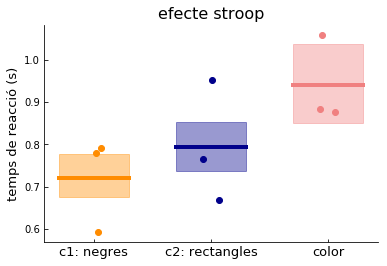

In [114]:
###

idxs_x = [0,1,2]
palette=['darkorange', 'darkblue', 'lightcoral']
cis = [ci_pn, ci_r, ci_pc]
means = [m_pn, m_r, m_pc]

for idx, cond in enumerate(['palabra negra (C1)', 'rectangulo (C2)', 'palabra color (E)']):
    
    ##plot_rectange
    plt.gca().add_patch(Rectangle((idx, cis[idx][0]), 0.6, cis[idx][1]-cis[idx][0], 
                                  alpha=0.4, fill=True, facecolor=palette[idx],
                                  linewidth=1,  edgecolor=palette[idx]))  
    ##plot_mean
    plt.plot([idx, idx+0.6], [means[idx], means[idx]], color=palette[idx], linewidth=4) 
    
    ##
    subj_values = df_simple[cond].values
    for i in range(len(subj_values)):
        jitter=np.random.uniform(-0.1, 0.1)
        plt.plot(idx+0.3+jitter, subj_values[i], color=palette[idx], marker='o', markersize=6 )
    


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xticks([0+0.3,1+0.3,2+0.3], ['c1: negres', 'c2: rectangles', 'color'], fontsize=13)
plt.xlabel('')
plt.ylabel('temps de reacció (s)', fontsize=13)
plt.yticks(fontsize=10)
plt.title('efecte stroop', fontsize=16)
#plt.ylim(0.5, 1.5);
plt.show(block=False)

### historgram trials

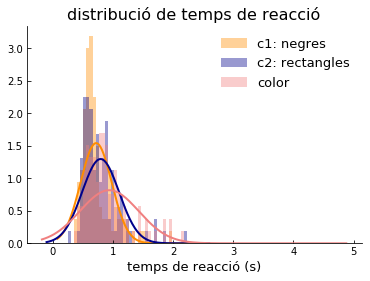

In [145]:
sns.distplot(list(data.loc[data['condition']=='palabra_negra', 'rt']),  color='darkorange', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'darkorange', 'linewidth':2}, label='c1: negres')

sns.distplot(list(data.loc[data['condition']=='rectangulo', 'rt']),  color='darkblue', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'darkblue', 'linewidth':2}, label='c2: rectangles' )

sns.distplot(list(data.loc[data['condition']=='palabra_color', 'rt']),  color='lightcoral', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'lightcoral', 'linewidth':2}, label='color' )

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc=1, frameon=False, prop={'size': 13})
plt.xlabel('temps de reacció (s)', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.title('distribució de temps de reacció', fontsize=16)
plt.show(block=False)


# Stats

#### Anova + multiple comparisons (simple)
##### The correct Anova should be paired

In [52]:

# df_stats = df.copy()
# df_stats['condition']= df_stats['condition'].replace(['palabra_negra', 'rectangulo', 'palabra_color'], ['control 1', 'control 2', 'test'])

# mod = ols(formula='rt ~ condition', data=df_stats).fit()
# aov_table = sm.stats.anova_lm(mod, typ=2)

# print( '                                 ')
# print( '                                 Anova Table')
# print( '==============================================================================')
# print( aov_table)
# print( '==============================================================================')
# print( '                                 ')
# print( '                                 ')
# print( '                                 ')



# ####### Multiple comparisons
# tukey = pairwise_tukeyhsd(endog=df_stats.rt.values, groups=df_stats['condition'].values,  alpha=0.05)
# print( tukey.summary()    )
# print( '                                 ')
# print( '                                ')


                                 
                                 Anova Table
              sum_sq     df          F        PR(>F)
condition   9.315502    2.0  50.413778  1.210691e-20
Residual   45.456097  492.0        NaN           NaN
                                 
                                 
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower  upper  reject
--------------------------------------------------
control 1 control 2  0.0395  -0.0392 0.1181 False 
control 1    test    0.3087   0.2301 0.3874  True 
control 2    test    0.2693   0.1906 0.3479  True 
--------------------------------------------------
                                 
                                


#### regression (subjects random intercepts - complex)

In [53]:
# resultados = smf.mixedlm(formula='rt ~ condition', data=df_stats, groups=df_stats['participant']).fit()
# print(resultados.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    rt       
No. Observations:    495        Method:                REML     
No. Groups:          5          Scale:                 0.0912   
Min. group size:     90         Likelihood:            -118.5016
Max. group size:     105        Converged:             Yes      
Mean group size:     99.0                                       
----------------------------------------------------------------
                       Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.666    0.029 22.711 0.000  0.608  0.723
condition[T.control 2] 0.039    0.033  1.187 0.235 -0.026  0.105
condition[T.test]      0.309    0.033  9.288 0.000  0.244  0.374
Group Var              0.002    0.006                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
